In [30]:
import pandas as pd
%pylab inline
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


# Читаем файл

In [31]:
dirtyDataset = 'dataset.csv'
data = pd.read_csv(dirtyDataset, delimiter=',')
#data = data.drop(columns='Unnamed: 0')
data

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,val
0,1.000000,0.805359,0.637046,0.431913,0.273591,0.146039,0.055003,0.047364,0.055267,0.050869,...,0.028625,0.068090,0.076983,0.048477,0.035140,0.035224,0.038017,0.034039,0.030657,0
1,0.919065,0.650257,0.469535,0.287707,0.097682,0.069675,0.028445,0.030572,0.033647,0.023890,...,0.095159,0.072771,0.058124,0.066473,0.063071,0.039538,0.043138,0.039108,0.035735,0
2,1.000000,0.748573,0.541968,0.307018,0.082736,0.056520,0.030559,0.033305,0.037139,0.027221,...,0.092298,0.052135,0.032254,0.068963,0.047953,0.025125,0.027283,0.028260,0.025849,0
3,0.900261,0.644294,0.490424,0.297212,0.181995,0.069115,0.056295,0.030417,0.044499,0.027705,...,0.026466,0.033901,0.036004,0.039943,0.008898,0.014738,0.018464,0.017645,0.016911,0
4,0.915002,0.664978,0.478112,0.274082,0.095502,0.058711,0.023298,0.027736,0.028032,0.025431,...,0.073496,0.063072,0.059083,0.057461,0.053498,0.034443,0.036691,0.034266,0.030975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.581627,0.107823,0.060806,0.107050,0.060961,0.039425,0.026221,0.006589,0.008290,0.015463,...,0.005462,0.001971,0.002486,0.002094,0.003407,0.001499,0.000309,0.001505,0.000866,6
1817,0.857155,0.251920,0.091603,0.093828,0.080212,0.016679,0.006143,0.008048,0.007102,0.002333,...,0.002651,0.002515,0.001487,0.002247,0.002905,0.001975,0.001511,0.000389,0.000354,6
1818,0.567871,0.152570,0.071177,0.098045,0.023735,0.021584,0.020654,0.002912,0.007059,0.009045,...,0.007051,0.004118,0.003582,0.002085,0.003014,0.003106,0.001158,0.002547,0.001751,6
1819,0.561637,0.150679,0.068585,0.035707,0.088462,0.058999,0.016553,0.020735,0.006538,0.022473,...,0.008024,0.006241,0.003374,0.003224,0.002229,0.005955,0.002499,0.003054,0.002675,6


data[data['val'] == 0]

# Названия упражнений

In [32]:
exercise = []
exercise.append ('Вращение рук') # 0
exercise.append ('Выпады') # 1
exercise.append ('Отжимания') # 2
exercise.append ('Подъем рук') # 3
exercise.append ('Пресс') # 4
exercise.append ('Приседания') # 5
exercise.append ('Прыжки на месте') # 6

# Рассматриваем взаимные корелляции упражнений

In [33]:
def correllator(data, numberEx):
    df1 = data[data['val'] == numberEx] # смотрим все упражнения одного вида
    corr = df1.T.corr(method='pearson') # ищем взаимную корелляцию каждого повторения с каждым
    # corr = df1.T.corr(method='spearman')
    corrMeans = np.zeros(corr.shape[0]) # массив средней корелляции повторений, размер равен числу повторений
    
    # для каждого повторения
    for i in range(corr.shape[0]):
        # ищем корелляцию со всеми остальными
        X = np.array(corr[i+corr.index[0]].sort_values())
        # ищем центр распределения корелляций со всеми остальными
        corrMeans[i] = X.mean() # и пишем это в массив
    return corrMeans # возвращаем среднюю корелляцию каждго повторения с остальными

# Строим распределение корелляций для всех видов упражнений

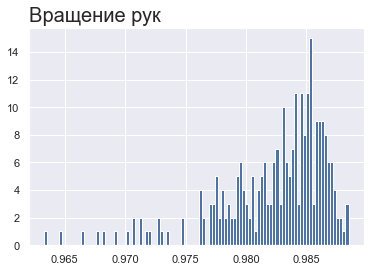

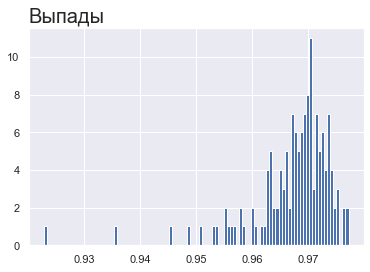

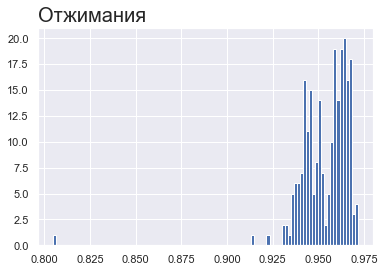

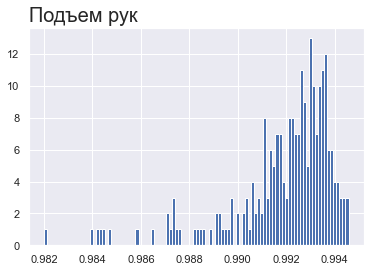

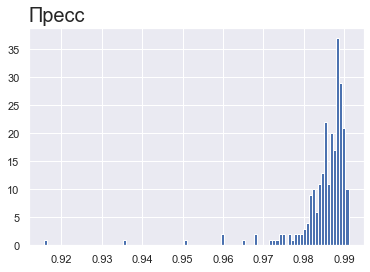

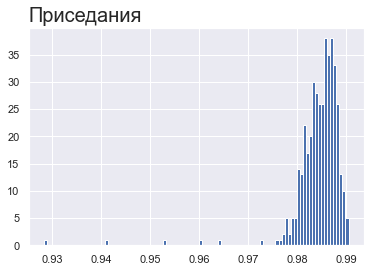

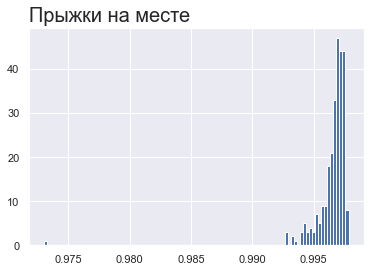

In [34]:
# для каждого вида упражнения
for i in range(7): # 7 видов упражнений
    # получаем распределение корелляций для всех повторений текущего вида упражнения
    corr = correllator(data = data, numberEx = i)
    # выводим распределения для всех повторений данного упражнения
    plt.hist(corr, bins = 100, density = False)
    plt.title(exercise[i], fontsize=20, loc="left")
    plt.show()
     
# по графикам необходимо выбрать порог корелляцци,ниже которого упражнение считается некачественным 

# Находим повторения, корелляция которых не вписывается в основню массу и считаем их некачественными

In [35]:
def findBad(numberEx,cutLower):
    df1 = data[data['val'] == numberEx] # смотрим все упражнения одного вида
    corr = df1.T.corr(method='pearson') # ищем взаимную корелляцию каждого с каждым
    corrMeans = corr.mean()
    # записываем номера упражнений из исходного датафрейма, подлежащих удалению при условии корелляции меньше cutLower 
    res = list(corrMeans.index[(corrMeans < cutLower)]) 
    return res

# Выбираем порог корелляции для каждого упражнения, ниже которого повторение считается негодным

In [36]:
badEx = []
print('badEx')
# badEx.append(findBad(numberEx, corr thresold))
badEx.append(findBad(0,0.978))
badEx.append(findBad(1,0.965))
badEx.append(findBad(2,0.935))
badEx.append(findBad(3,0.991))
badEx.append(findBad(4,0.982))
badEx.append(findBad(5,0.98))
badEx.append(findBad(6,0.996))

badEx


# Номера этих повторений

In [38]:
str(badEx)

'[[0, 2, 3, 5, 6, 11, 12, 14, 15, 21, 22, 46, 50, 61, 66, 71, 79, 103, 105, 111, 117, 119, 130, 131, 143, 149, 158, 161, 166, 192, 193, 197, 206, 210, 213, 229, 255, 257, 258, 260], [265, 273, 278, 287, 290, 291, 293, 299, 300, 302, 304, 307, 311, 314, 315, 331, 332, 337, 338, 343, 352, 353, 354, 360, 366, 368, 369, 371, 383, 384, 390, 397, 399, 400, 403], [489, 501, 518, 585, 592, 593, 602, 606], [644, 645, 646, 647, 648, 649, 652, 653, 654, 657, 658, 660, 661, 662, 668, 680, 683, 684, 690, 712, 738, 758, 764, 767, 774, 778, 782, 786, 787, 790, 800, 801, 803, 823, 828, 829, 830, 831, 844, 849, 860, 862, 863, 864, 870, 876, 878, 879], [883, 885, 886, 887, 888, 889, 890, 891, 892, 895, 896, 897, 898, 904, 909, 910, 914, 915, 929, 931, 932, 939, 940, 950, 953, 955, 969, 972, 973, 976, 980, 992, 1000, 1001, 1014, 1040, 1085, 1108, 1128], [1197, 1205, 1213, 1214, 1223, 1228, 1229, 1230, 1232, 1252, 1253, 1261, 1264, 1280, 1285, 1286, 1325, 1339, 1340, 1371, 1372, 1423, 1435, 1473, 1507, 15

# Удаляем выбранные повторения

In [41]:
goodEx = data.T.drop(badEx[0]+badEx[1]+badEx[2]+badEx[3]+badEx[4]+badEx[5]+badEx[6], axis=1)
goodEx # итоговый датафрейм (индексация непоследовательная)

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,val
0,0.919065,0.650257,0.469535,0.287707,0.097682,0.069675,0.028445,0.030572,0.033647,0.023890,...,0.095159,0.072771,0.058124,0.066473,0.063071,0.039538,0.043138,0.039108,0.035735,0.0
1,0.915002,0.664978,0.478112,0.274082,0.095502,0.058711,0.023298,0.027736,0.028032,0.025431,...,0.073496,0.063072,0.059083,0.057461,0.053498,0.034443,0.036691,0.034266,0.030975,0.0
2,0.943298,0.675661,0.431299,0.283745,0.129874,0.030283,0.041025,0.038935,0.024721,0.032911,...,0.105146,0.077540,0.062882,0.059446,0.066245,0.043524,0.043970,0.041461,0.036734,0.0
3,0.854656,0.603789,0.456104,0.267079,0.133675,0.044407,0.040785,0.030659,0.028377,0.026722,...,0.074257,0.062253,0.058276,0.053981,0.037465,0.036705,0.037930,0.034836,0.031074,0.0
4,0.814520,0.591758,0.413791,0.251815,0.068042,0.056686,0.021467,0.020842,0.028796,0.018224,...,0.090894,0.069485,0.055842,0.062890,0.060361,0.039716,0.040777,0.038231,0.034251,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,0.598552,0.174290,0.189361,0.058637,0.004739,0.029694,0.030058,0.015034,0.013995,0.016915,...,0.001722,0.002111,0.001415,0.000797,0.002557,0.001757,0.000622,0.000610,0.000239,6.0
1569,0.433229,0.070808,0.147804,0.036662,0.057302,0.023394,0.010334,0.005781,0.005787,0.005867,...,0.015245,0.012037,0.009007,0.005356,0.003042,0.001916,0.001556,0.000669,0.000230,6.0
1570,0.581627,0.107823,0.060806,0.107050,0.060961,0.039425,0.026221,0.006589,0.008290,0.015463,...,0.005462,0.001971,0.002486,0.002094,0.003407,0.001499,0.000309,0.001505,0.000866,6.0
1571,0.567871,0.152570,0.071177,0.098045,0.023735,0.021584,0.020654,0.002912,0.007059,0.009045,...,0.007051,0.004118,0.003582,0.002085,0.003014,0.003106,0.001158,0.002547,0.001751,6.0


# Было удалено повторений

In [39]:
wereDeleted = 0
for i in range(7):
    wereDeleted = wereDeleted + len(badEx[i])
wereDeleted

248

# Смотрим на полученный очищенный датасет

In [42]:
goodEx = goodEx.T.reset_index() # переиндексируем датасет
del goodEx['index'] # удалим лишнюю колонку для индексов
goodEx

,0,1,2,3,4,5,6,7,8,9,...,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572
0,0.919065,0.915002,0.943298,0.854656,0.814520,0.807029,0.813888,0.680385,0.815133,0.816430,...,0.351073,0.392340,0.403012,0.569876,0.453661,0.598552,0.433229,0.581627,0.567871,0.658874
1,0.650257,0.664978,0.675661,0.603789,0.591758,0.593411,0.571988,0.456454,0.586994,0.551416,...,0.106132,0.084827,0.097659,0.066718,0.133237,0.174290,0.070808,0.107823,0.152570,0.222594
2,0.469535,0.478112,0.431299,0.456104,0.413791,0.406831,0.380666,0.296386,0.419510,0.370737,...,0.062010,0.086759,0.092263,0.128293,0.100053,0.189361,0.147804,0.060806,0.071177,0.150936
3,0.287707,0.274082,0.283745,0.267079,0.251815,0.258959,0.230860,0.176865,0.245606,0.200822,...,0.047279,0.048983,0.037418,0.050306,0.056977,0.058637,0.036662,0.107050,0.098045,0.046713
4,0.097682,0.095502,0.129874,0.133675,0.068042,0.092595,0.055583,0.060814,0.068321,0.068103,...,0.029262,0.049350,0.055700,0.067566,0.016675,0.004739,0.057302,0.060961,0.023735,0.033807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.039538,0.034443,0.043524,0.036705,0.039716,0.038291,0.031330,0.032963,0.026720,0.021169,...,0.002120,0.000662,0.002721,0.001156,0.002461,0.001757,0.001916,0.001499,0.003106,0.001817
132,0.043138,0.036691,0.043970,0.037930,0.040777,0.038455,0.031848,0.033474,0.027819,0.022784,...,0.000375,0.001081,0.002467,0.000870,0.000509,0.000622,0.001556,0.000309,0.001158,0.000981
133,0.039108,0.034266,0.041461,0.034836,0.038231,0.035687,0.030303,0.030168,0.026615,0.022241,...,0.001132,0.001868,0.002422,0.001698,0.001209,0.000610,0.000669,0.001505,0.002547,0.001754
134,0.035735,0.030975,0.036734,0.031074,0.034251,0.032086,0.027371,0.027100,0.023942,0.020725,...,0.000840,0.001518,0.002100,0.001252,0.000796,0.000239,0.000230,0.000866,0.001751,0.001132


# Сохраняем в файл

In [26]:
goodEx.to_csv('Cleandataset.csv')